# Surface Brightness Profiles
Measuring the radius of a galaxy can be tricky.  Where do you define the 'edge'?  One way astronomers often define a galaxy radius is by modelling how the light from the galaxy falls off with radius, and using the properties of this fit to find the radius that encompasses half the light (i.e. the half-light radius).  Today, we are going to compare how the surface brightness of an elliptical and spiral galaxy differ as a function of radius.

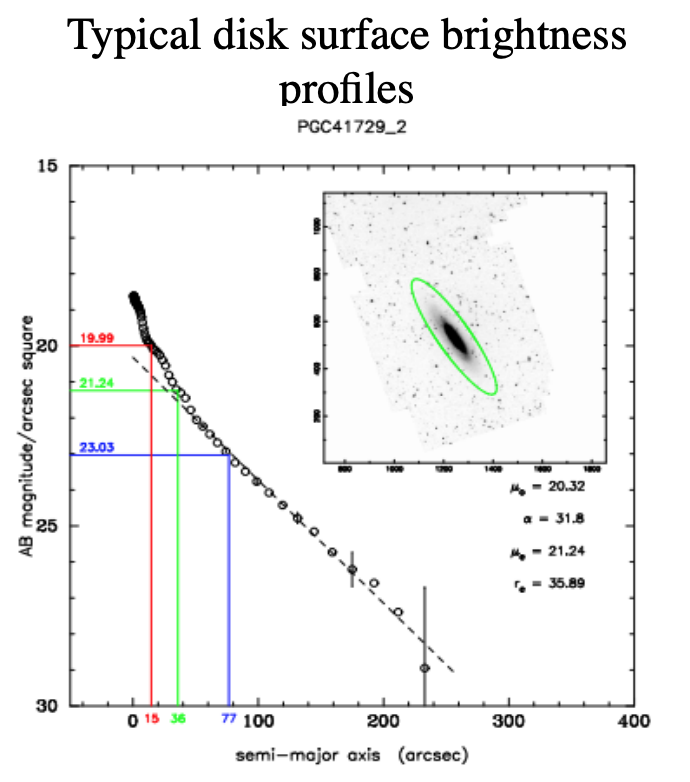

We are going to do make a couple plots like this one (in a semi-simplified way) using aperature photometry on two nearby galaxies, M89 and NGC0628.  Let's begin by loading the code and data!

In [1]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
from astropy import units as u
from astropy.coordinates import SkyCoord
from photutils import (SkyCircularAperture, aperture_photometry)
from astropy.wcs.wcs import WCS
from matplotlib import colors

In [2]:
spiral_file = 'ngc628.fits'
elliptical_file = 'M89_elliptical.fits'
hdu_s = fits.open(spiral_file)
hdu_e = fits.open(elliptical_file)
s_data = hdu_s[0].data
e_data = hdu_e[0].data

Now, let's take a look at the two galaxies I've chosen.  How would you classify them?

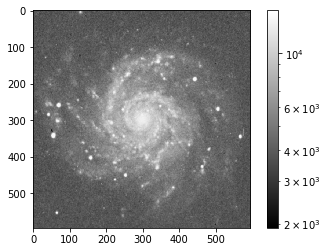

In [3]:
plt.imshow(s_data, cmap='gray', norm=colors.LogNorm())
plt.colorbar()

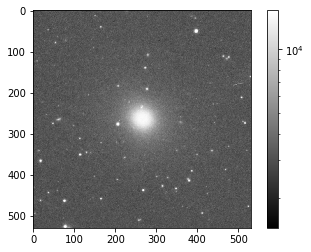

In [4]:
plt.imshow(e_data, cmap='gray', norm=colors.LogNorm())
plt.colorbar()

Great!  Now we can get to the aperature photometry.  We're going to do a quick-and-dirty version of this for now, so we will simply use circular aperatures centered on each galaxy.  The central RA and Dec for each are:

NGC0628
$$\rm{RA} = 24.174050, \rm{Dec} = 15.783461 $$

M89
$$\rm{RA} = 188.9159, \rm{Dec} = 12.5563 $$


I've gone ahead and made one aperature with a five arcsec radius for M89.  We'll walk through M89 together, then you all will do a similar process for NGC0628.

In [5]:
e_ra = 188.9159
e_dec = 12.5563
e_nuc = SkyCoord(e_ra, e_dec, unit='deg', frame='icrs')
e_aperture = SkyCircularAperture(e_nuc, r=5.0 * u.arcsec)
wcs = WCS(hdu_e[0].header)
e_phot_table = aperture_photometry(e_data, e_aperture, wcs = wcs)
print(e_phot_table['aperture_sum'])

   aperture_sum   
------------------
387558.91347522417


Changed DATE-OBS from '11/03/56          ' to '1956-03-11''. [astropy.wcs.wcs]


This would be the flux for the center of this galaxy. We want to measure surface brightness as a function of radius, so we will need multiple aperatures each growing in size.  I've gone ahead and made a set for M89.  To do this I used a for loop. For loops repeat a task a specified number of times. So, in this for loop, I have told python to plot circles with radii for each value in our radius array. I then tell python to extract the flux in that circle. Everything stays the same for each step except for the size of the radius. In the last step, I add the new flux value to an array with the command 'append'. Append takes the existing flux array and sticks our new value onto the end.

[3.87558913e+05 1.55190007e+06 3.48569520e+06 6.15208906e+06
 1.32411412e+07 2.16072644e+07 3.01022420e+07 3.82947052e+07
 4.63593192e+07 5.45673442e+07 6.30866631e+07 7.20521832e+07
 1.24777497e+08]


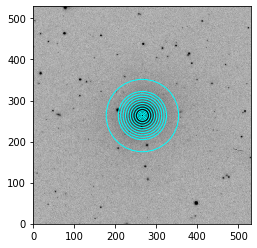

In [6]:
fig, ax = plt.subplots()
coords = wcs.wcs_world2pix(e_ra, e_dec, 0) #this command finds the x and y pixel coordinants from the RA and Dec given
radius = [5.0, 10.0, 15.0, 20., 30., 40., 50., 60., 70., 80., 90., 100., 150.]
cdelt = 1.7 #arcsec/pixel conversion
rad_pix = [x/cdelt for x in radius]
flux = []
for i in range(len(rad_pix)):
    circle = plt.Circle((coords[0], coords[1]), rad_pix[i], color='cyan', fill=False)
    ax.add_artist(circle)
    e_aperture = SkyCircularAperture(e_nuc, r=radius[i] * u.arcsec)
    e_phot_table = aperture_photometry(e_data, e_aperture, wcs = wcs)
    flux = np.append(flux, e_phot_table['aperture_sum'])
ax.imshow(e_data, cmap='gray_r', norm=colors.LogNorm(), origin='lower')
print(flux)

Now we have all the data we need to plot surface brightness as a function of radius!

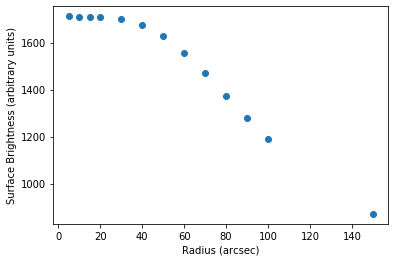

In [60]:
area = [np.pi * x**2 for x in radius]
plt.scatter(radius, flux/area)
plt.xlabel('Radius (arcsec)')
plt.ylabel('Surface Brightness (arbitrary units)')
plt.show()

I decided not to worry about converting the counts to a more reasonable flux unit, since we are mostly interested in the shape of the curve.  What do you notice?


Once you are done making observations, repeat the above process for NGC0628!  How is it different than M89?

Since this is an in-class activity, I skipped a few steps for expediancy.  What do you think these steps are?  What might you do differently if you were designing a project to examine how surface brighness changes with radius in different galaxy types?